<img style="float: right; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="350px" height="180px" /> 


# <font color= 'navy'> EDA - Desempleo en USA -  Parte II</font>
### <font color= #2E9AFE> Ética para la Ciencia de Datos</font>


- <Strong> José Manuel Haces López - 734759</Strong>


- <Strong> Claudia Celeste Castillejos Jáuregui - 735868 </Strong>


- <Strong> Marcela Quintero Perez - 717644 </Strong>


- <Strong> Pablo Ivan Orosco Beltran - 723252 </Strong>


<Strong> Fecha </Strong>:  Mayo 2023.


### <font color= #2E9AFE> Apéndice </font>

- Portada.
- Descripción de la base de datos.
- Objetivo.
- Desarrollo.
- Conclusiones.

### <font color= #2E9AFE>2. Descripción de la base de datos </font>

Como segunda parte del proyecto final de Ética para la Ciencia de Datos trabajaremos con otra base de datos que nos proporcionó la maestra con el fin de poner en practica nuestros conocimientos acerca del modelado de datos supervisados.

Este conjunto de datos también contiene datos contiene información en promedio de los ingresos que adquiere un empleado en USA.

Las variables que contiene el dataset son:

    - gender
    - race
    - ResId
    - income_cat
    - educ
    - voter_category
    

### <font color= #2E9AFE>3. Objetivos </font>

 * Conocer los efectos de las variables en cuanto a si votan o no votan.

### <font color= #2E9AFE>4. Desarrollo</font>
### <font color= #2E9AFE> EDA </font>

In [37]:
# Librerías
import imblearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Utilidades
from Utils import VariableAnalysis

In [38]:
# 1. Dataset de Desempleo por Grupos
# Cargando CSV
data = pd.read_csv("./Data/Procesado/Nonvoters_Dataset.csv")
data.head()

,RespId,educ,race,gender,income_cat,voter_category
0,470001,College,White,Female,$75-125k,always
1,470002,College,White,Female,$125k or more,always
2,470003,College,White,Male,$125k or more,sporadic
3,470007,Some college,Black,Female,$40-75k,sporadic
4,480008,High school or less,White,Male,$40-75k,always


In [39]:
data.dtypes

RespId             int64
educ              object
race              object
gender            object
income_cat        object
voter_category    object
dtype: object

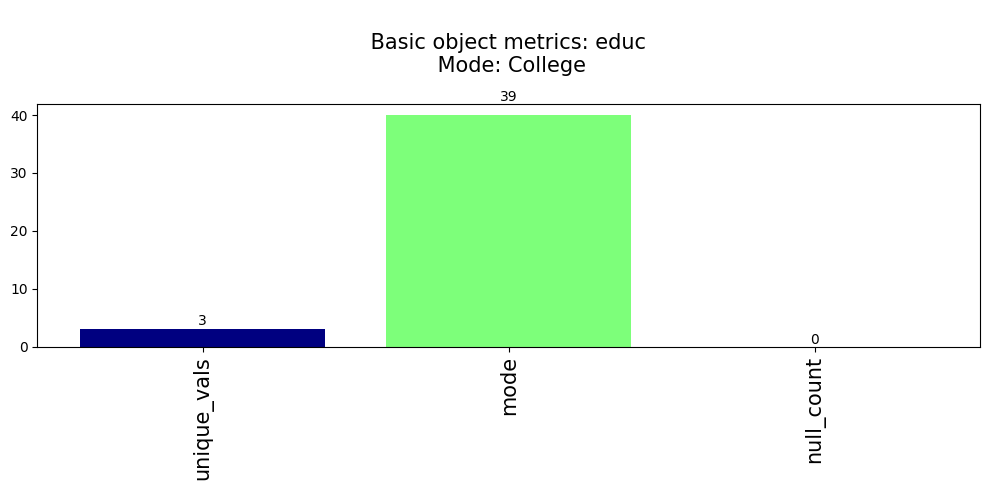

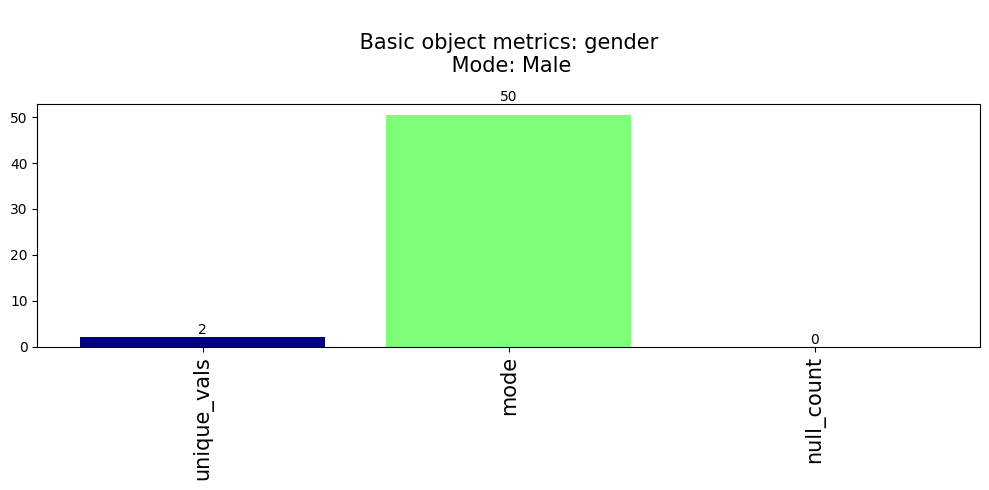

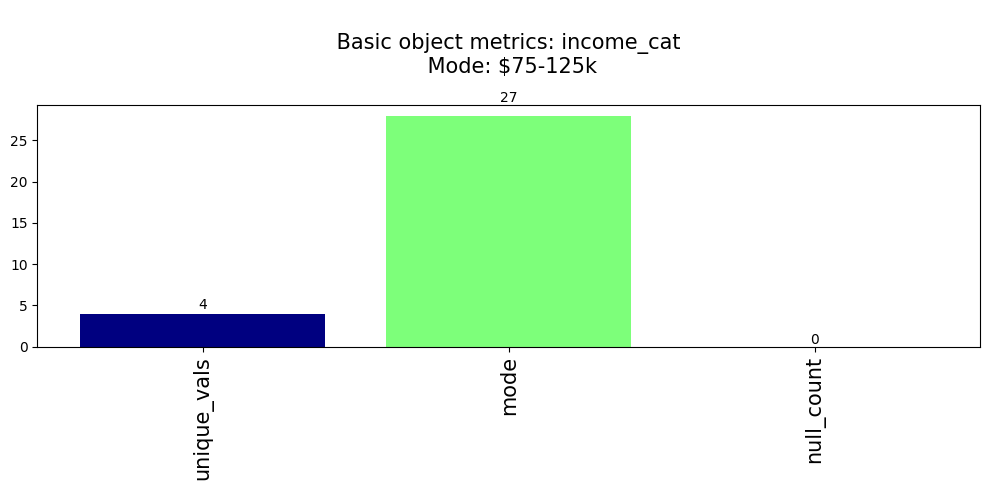

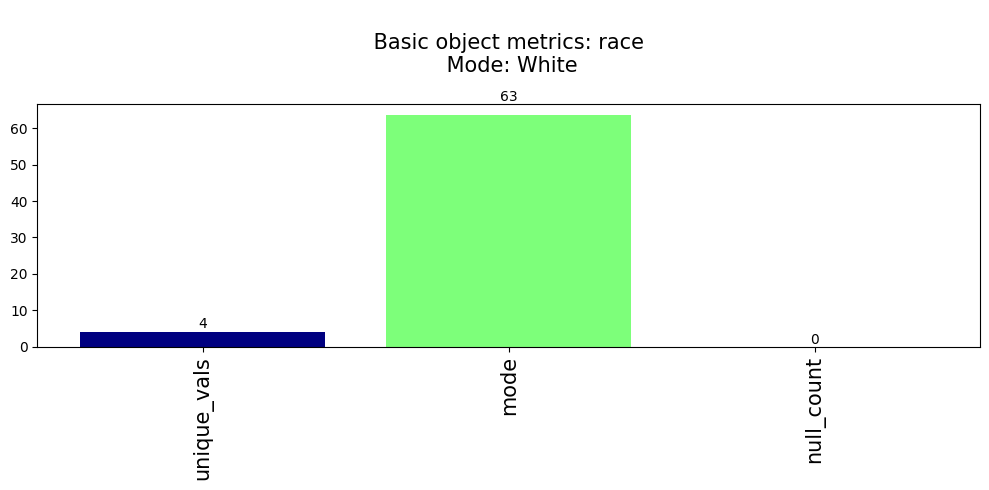

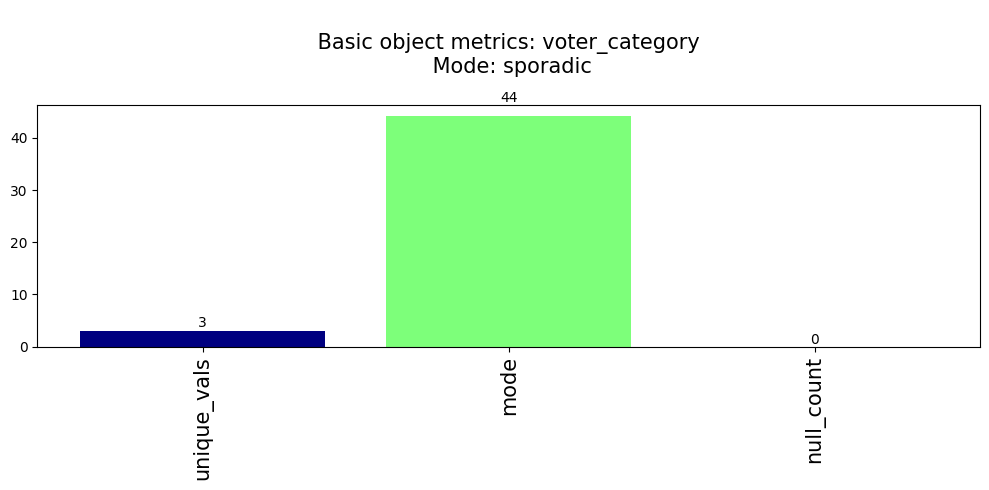

In [40]:
# Análisis Descriptivo
v_analysis = VariableAnalysis(df=data, pattern=[])
numeric_stats, object_stats, cleaned_df = v_analysis.fit_transform()
v_analysis.plot_categorical(df=data, object_stats=object_stats)

In [41]:
#Verificamos que no existan columnas con datos nulos
data.isnull().sum()

RespId            0
educ              0
race              0
gender            0
income_cat        0
voter_category    0
dtype: int64

Las clases  se encuentran un tanto imbaleanceadas por lo tanto utilizaremos el método de sobremuestreo (Synthetic Minority Oversampling Technique) SMOTE.

<Axes: xlabel='voter_category', ylabel='count'>

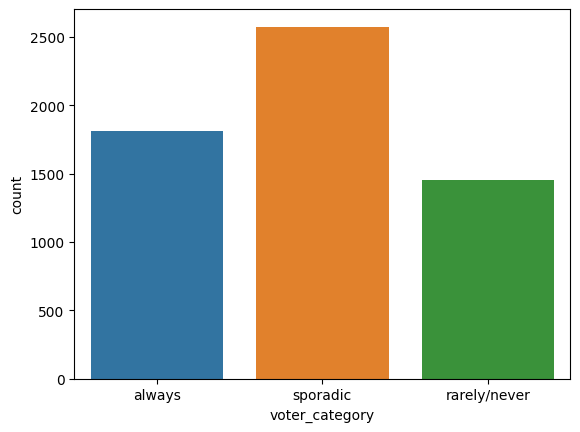

In [42]:
#Balanceamos los datos de salida usando algoritmo de SMOTE
# Plot de la variable target para ver el tamaño de las clases
sns.countplot(x='voter_category', data=data)